<h1>Dataset Overview</h1>

The HAM10000 dataset, hosted on Kaggle, is a comprehensive collection designed for skin cancer classification tasks. Officially titled "Human Against Machine with 10000 training images" (HAM10000), it includes 10,015 dermatoscopic images from various populations, capturing seven different types of skin lesions:

    Melanocytic nevi (nv)
    Melanoma (mel)
    Benign keratosis-like lesions (bkl)
    Basal cell carcinoma (bcc)
    Actinic keratoses and intraepithelial carcinoma (akiec)
    Vascular lesions (vasc)
    Dermatofibroma (df)

<h3>Data Exploration</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_images_L = pd.read_csv("hmnist_28_28_L.csv")
print(dataset_images_L.head(3))
print("shape of images: ",dataset_images_L.shape)

   pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        169        171        170        177        181        182   
1         19         57        105        140        149        148   
2        155        163        161        167        167        172   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel0775  pixel0776  \
0        181        185        194        192  ...        184        186   
1        144        155        170        170  ...        172        175   
2        155        152        165        175  ...        163        178   

   pixel0777  pixel0778  pixel0779  pixel0780  pixel0781  pixel0782  \
0        185        180        157        140        140        159   
1        160        144        114         89         47         18   
2        157        166        167        148        141        136   

   pixel0783  label  
0        165      2  
1         18      2  
2        115      2  

[3 rows x 785 columns]
shape of imag

This is the dataset with greyscale images, it holds information (colour values) about 784 (28x28) pixels. The last column holds a label which represents a skin cancer type the patient has.

In [3]:
#importing the RGB dataset
dataset_images_RGB = pd.read_csv("hmnist_28_28_RGB.csv")
print(dataset_images_RGB.head(3))
print("shape of images: ",dataset_images_RGB.shape)

   pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        192        153        193        195        155        192   
1         25         14         30         68         48         75   
2        192        138        153        200        145        163   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0        197        154        185        202  ...        173        124   
1        123         93        126        158  ...         60         39   
2        201        142        160        206  ...        167        129   

   pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0        138        183        147        166        185        154   
1         55         25         14         28         25         14   
2        143        159        124        142        136        104   

   pixel2351  label  
0        177      2  
1         27      2  
2        117      2  

[3 rows x 2353 columns]
shape of ima

The RGB dataset holds three times more information (three colums for each pixel for each RGB value).

<h3>The metadata</h3>
The metadata holds patient information for each image. It includes basic info such as sex and age but also information connected strictly to the disease such ase it's localisation, dx (diagnosis - skin cancer type), dx_type (diagnosis type).

dx_type (Diagnosis Type):

    This column indicates the method used to establish the diagnosis. The possible values include:
        histo for histopathology, where the lesion was confirmed by microscopic examination of tissue
        follow_up for follow-up examination
        consensus for consensus of multiple expert evaluations
        confocal for confocal microscopy

In [7]:
#importing the metadata 
dataset_metadata = pd.read_csv("HAM10000_metadata.csv")
print(dataset_metadata.head(3))
print("shape of metadata: ", dataset_metadata.shape)

     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
shape of metadata:  (10015, 7)


<h3>Original images vs 28x28 pixel versions</h3>
The dataset includes both original hisgh resolution images as well as versions of them reduced to 28x28 resolution which we are going to use in our project, here is what they look like compared to each other:

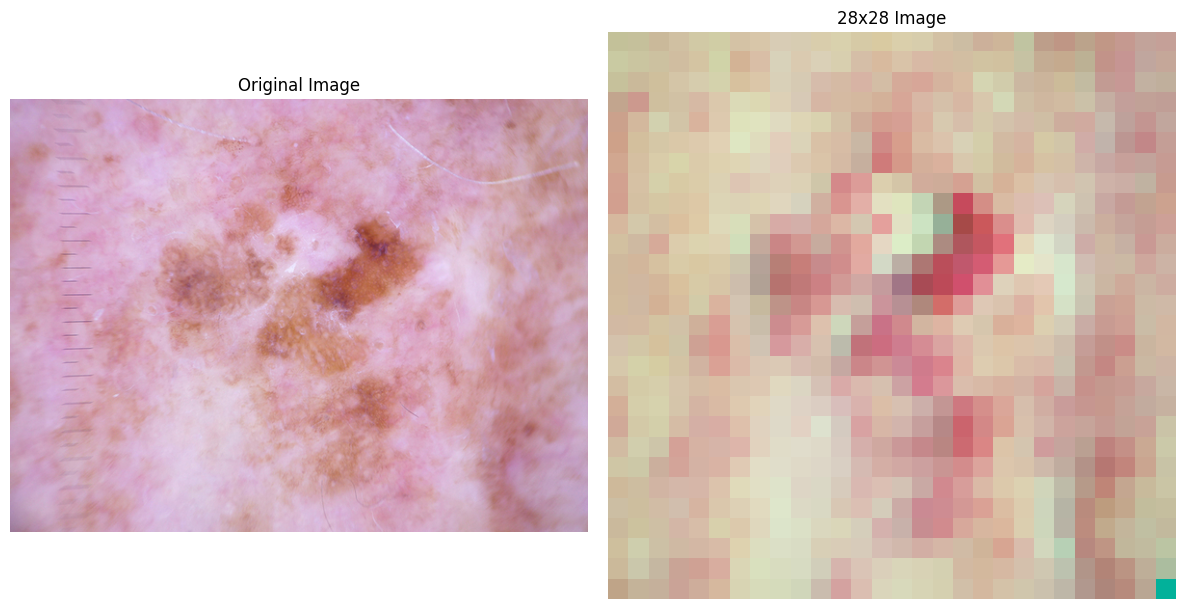

In [20]:
import os
import cv2 
import numpy as np

data_dir = 'HAM10000_images_part_1'

first_image_id = dataset_metadata.loc[0, 'image_id']
first_image_path = os.path.join( data_dir,f'{first_image_id}.jpg') 

image = cv2.imread(first_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  


image_data = dataset_images_RGB.iloc[0, 1:]  


image_array = np.array(image_data).astype(np.uint8).reshape(28, 28, 3)
image_array = image_array[..., ::-1]


fig, axes = plt.subplots(1, 2, figsize=(12, 6))


axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(image_array)
axes[1].set_title('28x28 Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()



<h2>Dataset exploration</h2>

Now we are going to explore the dataset a bit and see some of its most important charachteristics.

<h3>Distribution of different types of skin cancer in the dataset</h3>

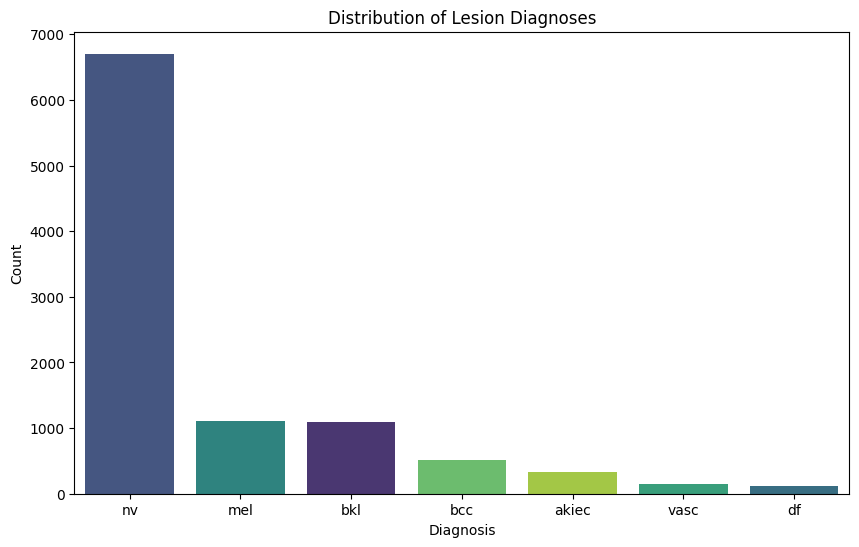

In [10]:
#plotting the distribution of diagnoses
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset_metadata, x='dx', order=dataset_metadata['dx'].value_counts().index, palette="viridis",hue='dx',legend=False)
plt.title('Distribution of Lesion Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


The above plot shows us that the vast majority of images in the dataset (nearly 7000 out of 10000) represent the nv (melanocytiv nevi) class.

<h3>The localization of the disease</h3>

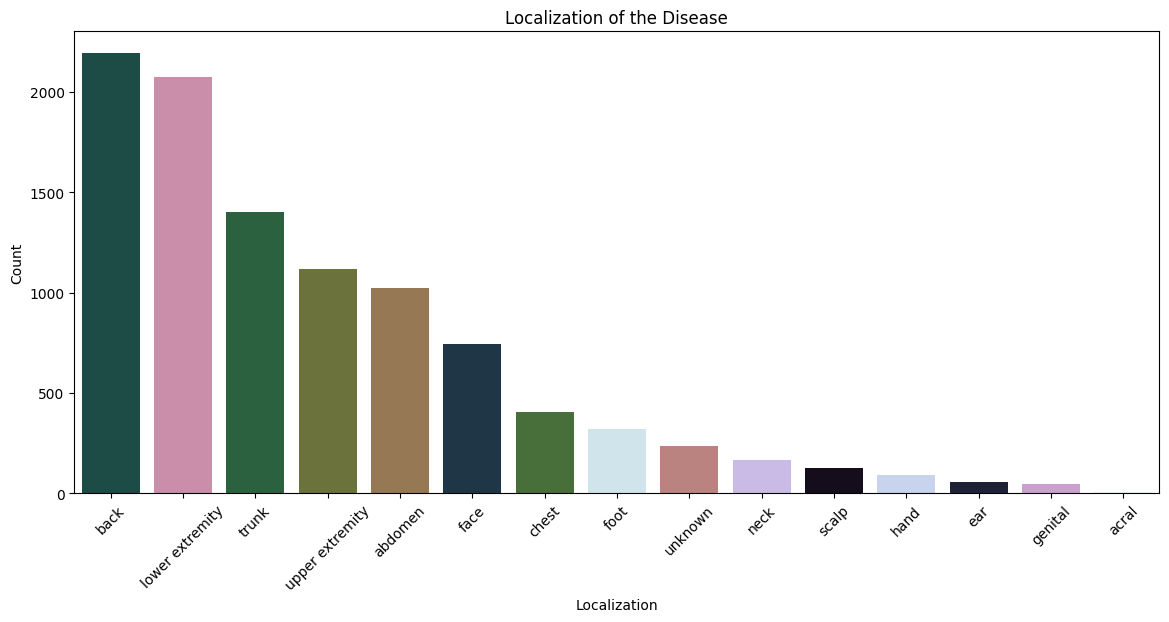

In [13]:
plt.figure(figsize=(14, 6))
sns.countplot(data=dataset_metadata, x='localization', hue='localization',legend=False,order=dataset_metadata['localization'].value_counts().index, palette="cubehelix")
plt.title('Localization of the Disease')
plt.xlabel('Localization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The most frequent locations on the body for skin cancer in the dataset are back, lower extremity and the trunk followed closely by the upper extremity.

<h3>The genders of patients</h3>

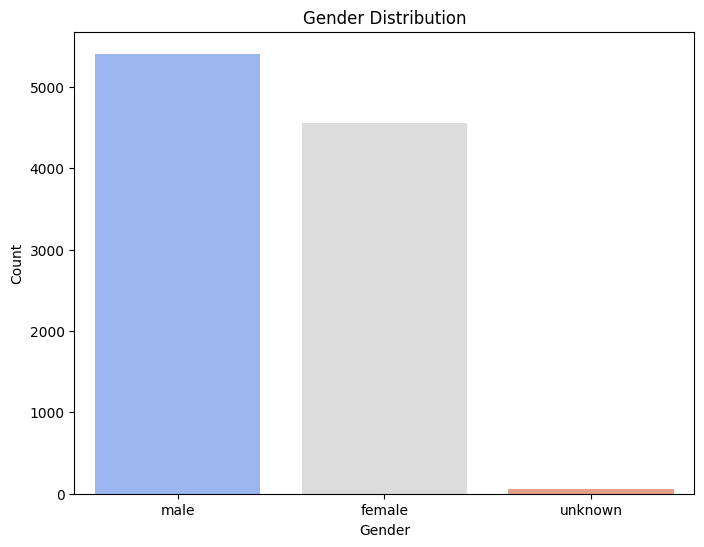

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset_metadata, x='sex', palette="coolwarm",hue='sex',legend=False)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The gender distribution shows that male patients represent about 10% more of the dataset than females.

<h3>Patient age distribution</h3>

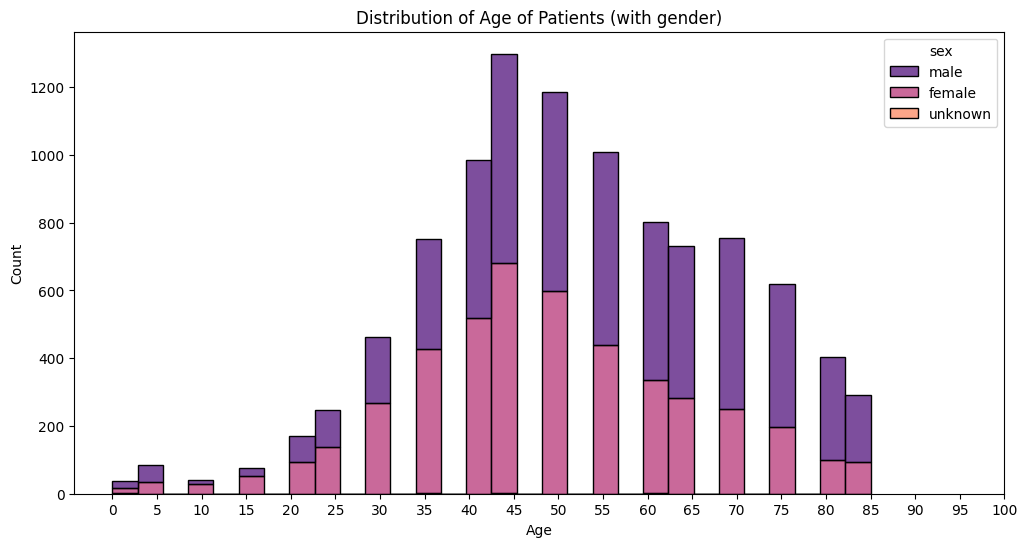

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(data=dataset_metadata, x='age', hue='sex', multiple='stack', palette="magma", bins=30)
plt.title('Distribution of Age of Patients (with gender)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(range(0, 101, 5))
plt.show()

As we can see on the plot the most represented group in the dataset are people between the ages of 40 - 60.